In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('D:/Data/Pokemon/pokemon_alopez247.csv')

In [3]:
df = df * 1
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,1,0.875,Monster,Grass,0,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,1,0.875,Monster,Grass,0,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,1,0.875,Monster,Grass,1,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,1,0.875,Monster,Dragon,0,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,1,0.875,Monster,Dragon,0,1.09,19.0,45,bipedal_tailed


In [4]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [5]:
colors_lst = ['#A8B820', '#705848', '#7038F8', '#F8D030', '#EE99AC', '#C03028', '#F08030', '#A890F0', '#705898', '#78C850', '#E0C068', 
              '#98D8D8', '#A8A878', '#A040A0', '#F85888', '#B8A038', '#B8B8D0', '#6890F0']
colors_dct = {'Bug':'#A8B820', 'Dark':'#705848', 'Dragon':'#7038F8', 'Electric':'#F8D030', 
              'Fairy':'#EE99AC', 'Fighting':'#C03028', 'Fire':'#F08030', 'Flying':'#A890F0', 
              'Ghost':'#705898', 'Grass':'#78C850', 'Ground':'#E0C068', 'Ice':'#98D8D8', 
              'Normal':'#A8A878', 'Poison':'#A040A0', 'Pyschic':'#F85888', 'Rock':'#B8A038', 
              'Steel':'#B8B8D0', 'Water':'#6890F0'}

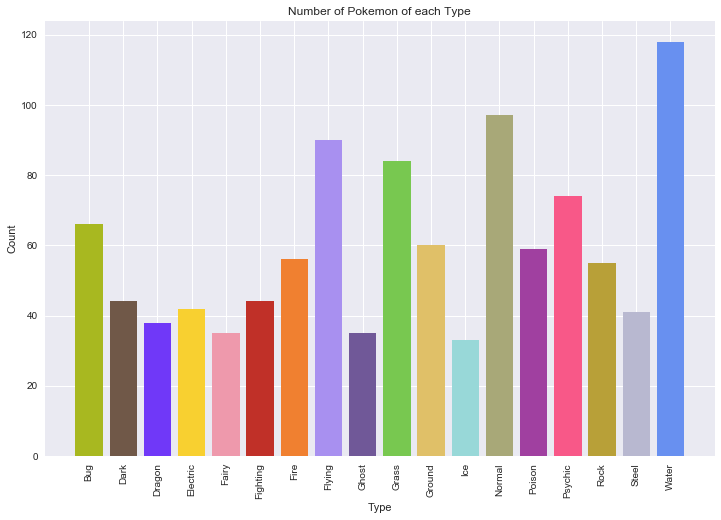

In [13]:
x = np.arange(len((df.groupby('Type_1').count() + df.groupby('Type_2').count()).index))
y = (df.groupby('Type_1').count() + df.groupby('Type_2').count())['Number']

plt.figure(figsize=(12, 8))
plt.bar(x, y, color=colors_lst)
plt.xticks(x, (df.groupby('Type_1').count() + df.groupby('Type_2').count()).index, rotation='vertical')
plt.title('Number of Pokemon of each Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
plt.close()

In [15]:
import ipywidgets as widgets
from IPython.display import display

group_by = {'Type':sorted(df['Type_1'].unique()),
            'Stat':['Total', 'HP','Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']}

def select_view(Group):
    vW.options = group_by[Group]
    print('Choose to view types or stats.')
    print('')

def display_view(View):
    print('Choose to view specific type or stat.')
    print('')
    if View in df['Type_1'].unique():
        temp = df.loc[(df['Type_1'] == View) | (df['Type_2'] == View)]

        plt.figure(figsize=(12, 8))
        sns.boxplot(data=temp[['HP','Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']], color=colors_dct[View])
        plt.xlabel('Stat')
        plt.title('{} Stats'.format(View))
    elif View in ['Total', 'HP','Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']:
        empty = pd.DataFrame(columns=[View, 'Type'])
        for type_ in sorted(df['Type_1'].unique()):
            test = df[['Type_1', 'Type_2', View]].loc[(df['Type_1'] == type_) | (df['Type_2'] == type_)]
            test['Type'] = type_
            test = test[[View, 'Type']]
            empty = empty.append(test)
        empty[View] = empty[View].astype(int)
        empty['Type'] = empty['Type'].astype(str)
        
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Type', y=View, data=empty, palette=colors_lst)
        plt.xlabel('Type')
        plt.title('{} by Type'.format(View))
    plt.show()
    plt.close()

gW = widgets.Dropdown(options=list(group_by.keys()))
vW = widgets.Dropdown()

i = widgets.interactive(select_view, Group=gW)
j = widgets.interactive(display_view, View=vW)

display(i)
display(j)

interactive(children=(Dropdown(description='Group', options=('Type', 'Stat'), value='Type'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='View', options=('Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'), value='Bug'), Output()), _dom_classes=('widget-interact',))